
# <center> Семинар 3-4

## <center> Cпециализированные библиотеки Python для численных методов и анализа данных. Библиотека NumPy. Библиотека SciPY. Решение дифференциальных уравнений с помощью Python. Ускорение кода с помощью библиотек Theano и TensorFlow. Первичный анализ данных с Pandas и визуализация с помощью библиотек Seaborn/Matplotlib/Plotly.<center> 

Теперь начнем знакомство со специализированными библиотеками Python. Первой рассмотрим библиотеку NumPy (Numerical Python) - аналог MATLAB. Это библиотека создана для работы и быстрых вычислений над многомерными массивами. 

# Numpy

Списки в Python не являются векторами, по умолчанию над ними нельзя производить поэлементные операции.В Python необходимо определять собственные функции, чтобы оперировать списками как векторами. Для сравнения: в numpy для аналогичных операций достаточно одной строки кода.

Важные отличия между NumPy arrays и Python sequences:

 - NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
 - Элементы в NumPy array должны быть одного типа
 - Можно выполнять операции непосредственно над NumPy arrays


 <img src="./images/z4GzOX6.png",width=500,height=500>

## Создание массивов

Основой библиотеки NumPy является объект  **ndarray** - многомерный массив. Проще всего создать ndarray с помощью функции array. Она принимает любой объект, похожий на последовательность и порождает новый массив NumPy, содержащий переданные данные. 

Генерация Numpy arrays

- arange — аналог range из Python, которому можно передать нецелочисленный шаг
- linspace — способ равномерно разбить отрезок на n-1 интервал
- logspace — способ разбить отрезок по логарифмической шкале
- zeros — создаёт массив заполненный нулями заданной размерности
- ones — создаёт массив заполненный единицами заданной размерности
- empty — создаёт массив неинициализированный никаким значением заданной размерности

Пример создания массива из списка:

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

data = [[6, 6.7, 8, 10, 1],[5, 7, 1.04, 4, 5]]
arr = np.array(data)

In [17]:
arr

array([[ 6.  ,  6.7 ,  8.  , 10.  ,  1.  ],
       [ 5.  ,  7.  ,  1.04,  4.  ,  5.  ]])

Pазмеры массива храниться в поле shape, а количество размерностей - в ndim

In [18]:
arr.ndim

2

In [19]:
arr.shape

(2, 5)

Также можно создать массивы из нулей и единиц с помощью zeros и ones, а empty создает массив, не инициализируя элементы. Для созданя новых массивов необходимо передать кортеж, описывающий формы:

In [25]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
np.empty((2,2,2))

array([[[-1.28822975e-231, -1.28822975e-231],
        [ 6.93040619e-310,  6.93040619e-310]],

       [[ 6.93040619e-310,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]]])

In [27]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Метод reshape позволяет преобразовать размеры массива без изменения данных

In [30]:
array = np.arange(0, 6, 0.5)
array = array.reshape((2, 6))
array

array([[0. , 0.5, 1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5, 5. , 5.5]])

Для того что бы развернуть многомерный массив в вектор, можно воспользоваться функцией ravel

In [32]:
array = np.ravel(array)
array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

## Индексация

В NumPy используется стандартная индексация Python

In [39]:
array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [37]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


In [38]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([0., 1., 2., 3., 4., 5.])

In [42]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

Чтобы выбрать подмножество строк в опредленном порядке, можно просто передать список или массив целых чисел, описывающих желаемый порядок:

In [44]:
arr[[4, 0, 3, 6]]

array([[4., 4., 4., 4.],
       [0., 0., 0., 0.],
       [3., 3., 3., 3.],
       [6., 6., 6., 6.]])

In [45]:
arr[[-3, -4, -5]]

array([[5., 5., 5., 5.],
       [4., 4., 4., 4.],
       [3., 3., 3., 3.]])

Если мы передаем несколько массивов индексов, то выбирается одномерный массив элементов, соответствующих каждому котрежу индексов:

In [48]:
arr = np.arange(32).reshape((8, 4))

In [50]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [51]:
arr[[1, 5, 7, 2],[0, 3, 1, 2]]

array([ 4, 23, 29, 10])

В этом примере отбираются элементы в позициях (1, 0), (5, 3), (7, 1), (2, 2)

Чтобы получить прямоугольный срез можно воспользоваться функцией np.ix_

In [54]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Операции над векторами

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов. Такой способ замены явных циклов выражениями-массивами называется векторизацией.

Например, вычисление поэлементной разности между векторами выглядит следующим образом:

In [67]:
arr1 = np.random.randint(1,100,32).reshape((8,4))
arr2 = np.random.randint(100,200,32).reshape((8,4))

In [68]:
arr2 - arr1

array([[116,  96,  96,  63],
       [ 23,  80, 141,  65],
       [113, 166,  93, 112],
       [ 42,  71, 173, 114],
       [ 30, 105,  69,  73],
       [ 28,  20, 108, 150],
       [111,  86,  37, 101],
       [180,  86, 156,  93]])

#### Все арифметические операции над массивами одинаковой размерности производятся поэлементно.

## [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё таки созгласованных размерностей. Простейшим примером является умножение вектора на число:

 <img src="./images/tE3ZCWG.gif",width=500,height=500>

Правило согласования размерностей выражается в одном предложение:

> **In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one**

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:

    a  = np.ones((2,3,4))
    b = np.ones(4)
    c = a * b # here a.shape=(2,3,4) and b.shape is considered to be (1,1,4)

Прибавим к каждой строчки матрицы один и тот же вектор:

 <img src="./images/VsP2dqT.gif",width=500,height=500>

In [77]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

 <img src="./images/9LvGoeL.gif",width=500,height=500>

Сначала нужно преоброзовать вектор к виду:

In [79]:
np.arange(4)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

А затем к нему добавить матрицу:

In [80]:
np.arange(4)[:, np.newaxis]+np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Транспонирование производится с помощью *array.T*

Так же в NumPy реализованно много полезных операций для работы с массивами: np.min, np.max, np.sum, np.mean и т.д.

Замечание: В каждой из перечисленных функций есть параметр axis, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

В модуле *numpy.linalg* имеется стандартный набор алгоритмов, в частности, разложение матриц, нахождение обратной матрицы и вычисление определителя. 

## Конкатенация многомерных массивов


Конкатенировать несколько массивом можно с помощью функций np.concatenate, np.hstack, np.vstack

In [86]:
np.hstack([arr1, arr2])

array([[ 72,   7,  78,  64, 188, 103, 174, 127],
       [ 99,  37,  53,  59, 122, 117, 194, 124],
       [ 39,  24,  85,  82, 152, 190, 178, 194],
       [ 88,  95,   2,  69, 130, 166, 175, 183],
       [ 92,  57,  55,  42, 122, 162, 124, 115],
       [ 98,  95,   4,  29, 126, 115, 112, 179],
       [  5,  97,  67,  42, 116, 183, 104, 143],
       [ 19,  97,  42,  94, 199, 183, 198, 187]])

In [87]:
np.vstack([arr1, arr2])

array([[ 72,   7,  78,  64],
       [ 99,  37,  53,  59],
       [ 39,  24,  85,  82],
       [ 88,  95,   2,  69],
       [ 92,  57,  55,  42],
       [ 98,  95,   4,  29],
       [  5,  97,  67,  42],
       [ 19,  97,  42,  94],
       [188, 103, 174, 127],
       [122, 117, 194, 124],
       [152, 190, 178, 194],
       [130, 166, 175, 183],
       [122, 162, 124, 115],
       [126, 115, 112, 179],
       [116, 183, 104, 143],
       [199, 183, 198, 187]])

## Запись логический условий

Функция np.where - это векторный вариант тернарного выражения 

    x if condition else y

Пусть, например, у нас есть два массива значений и один булев массив:

In [93]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Мы хотим брать значение из массива *xarr* если значение в *cond = True* и из массива *yarr*, если значение равно *False*.

In [94]:
result = np.where(cond, xarr, yarr)

In [95]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

## Векторные операции

In [27]:
arr = np.arange(16).reshape((4, 4))

Нахождение обратной матрицы

In [29]:
np.linalg.inv(arr)  # аналогично arr.I

array([[ 9.00719925e+14, -4.50359963e+14, -1.80143985e+15,
         1.35107989e+15],
       [-2.40191980e+15,  2.70215978e+15,  1.80143985e+15,
        -2.10167983e+15],
       [ 2.10167983e+15, -4.05323966e+15,  1.80143985e+15,
         1.50119988e+14],
       [-6.00479950e+14,  1.80143985e+15, -1.80143985e+15,
         6.00479950e+14]])

Нахождение определителя

In [31]:
np.linalg.det(arr)

-2.9582283945787796e-30

Литература по NumPy

- http://numpy.scipy.org
- http://scipy.org/Tentative_NumPy_Tutorial
- http://scipy.org/NumPy_for_Matlab_Users 

# SciPy - Library of scientific algorithms for Python

SciPy — это открытая библиотека высококачественных научных инструментов для языка программирования Python. SciPy содержит модули для оптимизации, интегрирования, специальных функций, обработки сигналов, обработки изображений, генетических алгоритмов, решения обыкновенных дифференциальных уравнений, и других задач обычно решаемых в науке и при инженерной разработке. 

In [58]:
from scipy import *

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

## Специальные функции

Приведем пример использования модуля специальных функций на примере функции Бесселя. 

In [59]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [60]:
n = 0    # порядок
x = 0.0

# функция Бесселя первого рода
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# функция Бесселя второго рода
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


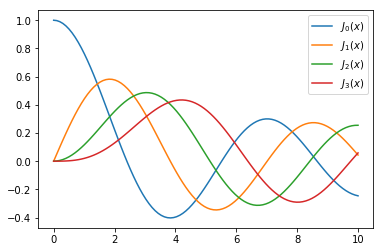

In [61]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

## Обыкновенные дифференциальные уравнения

SciPy предоставляет две возможности для решения ОДУ: API основанное на функции `odeint` и объектно-ориентированное API, основанное на классе `ode`. Обычно `odeint` более прост в использовании и подходит для знакомства с пакетом, в то время как класс `ode` дает большие возможности для настройки.  

In [62]:
from scipy.integrate import odeint, ode
from math import *

Система обыкновенных дифференциальных уравнений в стандартном виде обычно записывается так:

$y' = f(y, t)$

где

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

и  $f$ - это это некоторая функция которая равно производной функции $y_i(t)$. Для решения ОДУ мы должны знать правую часть $f$ и начальные условия $y(0)$.

Когда мы задали функцию `f`  и вектор `y_0` - мы можем использовать функцию `odeint`:

    y_t = odeint(f, y_0, t)


#### Пример: двойной маятник

Возьмем в качестве примера движение двойного маятника, подробно описанное здесь https://ru.wikipedia.org/wiki/Двойной_маятник

In [63]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Уравнения движения для маятника зписываются следующим образом:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Для того, чтобы сделать код на Python проще, введем новую переменную $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [79]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    правая часть уравнения движения маятника
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [80]:
# задание начальных условий
x0 = [pi/4, pi/2, 0, 0]

In [81]:
x0

[0.7853981633974483, 1.5707963267948966, 0, 0]

In [82]:
# задание сетки по времени
t = np.linspace(0, 10, 250)

In [83]:
t

array([ 0.        ,  0.04016064,  0.08032129,  0.12048193,  0.16064257,
        0.20080321,  0.24096386,  0.2811245 ,  0.32128514,  0.36144578,
        0.40160643,  0.44176707,  0.48192771,  0.52208835,  0.562249  ,
        0.60240964,  0.64257028,  0.68273092,  0.72289157,  0.76305221,
        0.80321285,  0.84337349,  0.88353414,  0.92369478,  0.96385542,
        1.00401606,  1.04417671,  1.08433735,  1.12449799,  1.16465863,
        1.20481928,  1.24497992,  1.28514056,  1.3253012 ,  1.36546185,
        1.40562249,  1.44578313,  1.48594378,  1.52610442,  1.56626506,
        1.6064257 ,  1.64658635,  1.68674699,  1.72690763,  1.76706827,
        1.80722892,  1.84738956,  1.8875502 ,  1.92771084,  1.96787149,
        2.00803213,  2.04819277,  2.08835341,  2.12851406,  2.1686747 ,
        2.20883534,  2.24899598,  2.28915663,  2.32931727,  2.36947791,
        2.40963855,  2.4497992 ,  2.48995984,  2.53012048,  2.57028112,
        2.61044177,  2.65060241,  2.69076305,  2.73092369,  2.77

In [92]:
# решение системы
x = odeint(dx, x0, t)

In [93]:
x.shape

(250, 4)

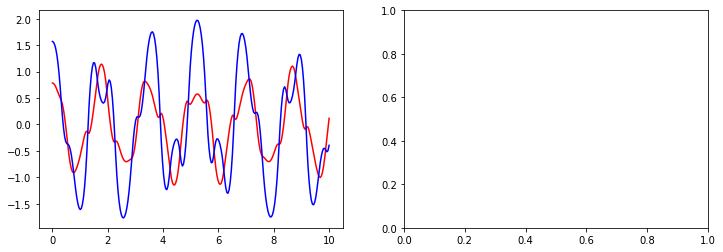

In [87]:
# построим углы в зависимости от времени

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")

In [88]:

x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

TypeError: only size-1 arrays can be converted to Python scalars

In [99]:
sin(x[:, 0])

TypeError: only size-1 arrays can be converted to Python scalars

In [98]:
x[:, 0].shape

(250,)

In [102]:
type(x)

numpy.ndarray